**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 49.0 MB/s eta 0:00:00


**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [5]:
base = pd.read_csv('/content/sample_data/weather.numeric.csv', ',')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [ ]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [6]:
base

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [7]:
base.head(3)

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes


In [8]:
base.tail(2)

,outlook,temperature,humidity,windy,play
12,overcast,81,75,False,yes
13,rainy,71,91,True,no


**Contando quantidade de instâncias**


In [9]:
np.unique(base['play'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

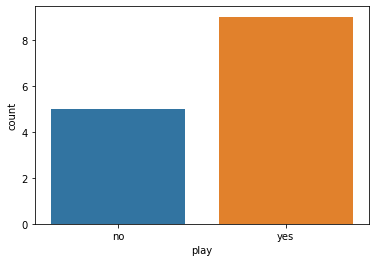

In [10]:
sns.countplot(x = base['play']);

**Separando os atributos de entrada e de classe**

In [12]:
X_prev = base.iloc[:, 0:5].values

In [13]:
X_prev

array([['sunny', 85, 85, False, 'no'],
       ['sunny', 80, 90, True, 'no'],
       ['overcast', 83, 86, False, 'yes'],
       ['rainy', 70, 96, False, 'yes'],
       ['rainy', 68, 80, False, 'yes'],
       ['rainy', 65, 70, True, 'no'],
       ['overcast', 64, 65, True, 'yes'],
       ['sunny', 72, 95, False, 'no'],
       ['sunny', 69, 70, False, 'yes'],
       ['rainy', 75, 80, False, 'yes'],
       ['sunny', 75, 70, True, 'yes'],
       ['overcast', 72, 90, True, 'yes'],
       ['overcast', 81, 75, False, 'yes'],
       ['rainy', 71, 91, True, 'no']], dtype=object)

In [15]:
X_prev_label = base.iloc[:, 0:5]

In [16]:
X_prev_label

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [18]:
X_prev[:,1]

array([85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
      dtype=object)

In [21]:
y_classe = base.iloc[:,1].values

In [22]:
y_classe

array([85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71])

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [ ]:
#X = base.copy() 
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

In [25]:
X_prev[:,0]

array(['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy',
       'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
       'overcast', 'rainy'], dtype=object)

In [26]:
X_prev

array([['sunny', 85, 85, False, 'no'],
       ['sunny', 80, 90, True, 'no'],
       ['overcast', 83, 86, False, 'yes'],
       ['rainy', 70, 96, False, 'yes'],
       ['rainy', 68, 80, False, 'yes'],
       ['rainy', 65, 70, True, 'no'],
       ['overcast', 64, 65, True, 'yes'],
       ['sunny', 72, 95, False, 'no'],
       ['sunny', 69, 70, False, 'yes'],
       ['rainy', 75, 80, False, 'yes'],
       ['sunny', 75, 70, True, 'yes'],
       ['overcast', 72, 90, True, 'yes'],
       ['overcast', 81, 75, False, 'yes'],
       ['rainy', 71, 91, True, 'no']], dtype=object)

In [27]:
label_encoder_Outlook = LabelEncoder()
label_encoder_Temperature = LabelEncoder()
label_encoder_Humidity = LabelEncoder()

In [28]:
X_prev[:,0] = label_encoder_Outlook.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Temperature.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_Humidity.fit_transform(X_prev[:,2])


In [29]:
X_prev

array([[2, 11, 4, False, 'no'],
       [2, 8, 6, True, 'no'],
       [0, 10, 5, False, 'yes'],
       [1, 4, 9, False, 'yes'],
       [1, 2, 3, False, 'yes'],
       [1, 1, 1, True, 'no'],
       [0, 0, 0, True, 'yes'],
       [2, 6, 8, False, 'no'],
       [2, 3, 1, False, 'yes'],
       [1, 7, 3, False, 'yes'],
       [2, 7, 1, True, 'yes'],
       [0, 6, 6, True, 'yes'],
       [0, 9, 2, False, 'yes'],
       [1, 5, 7, True, 'no']], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [31]:
len(np.unique(base['temperature'])) 

12

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
X_prev

array([[1.0, 0.0, 2, 11, 4, False],
       [1.0, 0.0, 2, 8, 6, True],
       [0.0, 1.0, 0, 10, 5, False],
       [0.0, 1.0, 1, 4, 9, False],
       [0.0, 1.0, 1, 2, 3, False],
       [1.0, 0.0, 1, 1, 1, True],
       [0.0, 1.0, 0, 0, 0, True],
       [1.0, 0.0, 2, 6, 8, False],
       [0.0, 1.0, 2, 3, 1, False],
       [0.0, 1.0, 1, 7, 3, False],
       [0.0, 1.0, 2, 7, 1, True],
       [0.0, 1.0, 0, 6, 6, True],
       [0.0, 1.0, 0, 9, 2, False],
       [1.0, 0.0, 1, 5, 7, True]], dtype=object)

In [42]:
X_prev[:,0:5]

array([[1.0, 0.0, 2, 11, 4],
       [1.0, 0.0, 2, 8, 6],
       [0.0, 1.0, 0, 10, 5],
       [0.0, 1.0, 1, 4, 9],
       [0.0, 1.0, 1, 2, 3],
       [1.0, 0.0, 1, 1, 1],
       [0.0, 1.0, 0, 0, 0],
       [1.0, 0.0, 2, 6, 8],
       [0.0, 1.0, 2, 3, 1],
       [0.0, 1.0, 1, 7, 3],
       [0.0, 1.0, 2, 7, 1],
       [0.0, 1.0, 0, 6, 6],
       [0.0, 1.0, 0, 9, 2],
       [1.0, 0.0, 1, 5, 7]], dtype=object)

In [43]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [4, 5])], remainder='passthrough')


In [44]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [45]:
X_prev

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 2, 11],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,
        0.0, 2, 8],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 0, 10],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        1.0, 1, 4],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 1, 2],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,
        0.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0, 0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 2, 6],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 2, 3],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 1, 7],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 

In [46]:
X_prev.shape

(14, 16)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [ ]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_prev

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 2, 11],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,
        0.0, 2, 8],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 0, 10],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        1.0, 1, 4],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 1, 2],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,
        0.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0, 0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 2, 6],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 2, 3],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 1, 7],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 

In [49]:
y_classe

array([85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71])

In [50]:
y_classe.shape

(14,)

In [51]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [52]:
X_treino.shape

(11, 16)

In [53]:
X_teste.shape

(3, 16)

In [54]:
X_teste

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 2, 3],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        1.0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 1, 2]], dtype=object)

In [55]:
y_treino

array([72, 83, 71, 75, 80, 72, 75, 70, 85, 65, 81])

In [56]:
y_teste

array([69, 64, 68])

In [57]:
import pickle

In [58]:
with open('/content/sample_data/weather.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)